In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Pearson.csv')
df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [18]:
df.shape

(1078, 2)

In [19]:
df.size

2156

In [20]:
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [21]:
df.tail()

,Father,Son
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3
1077,70.3,67.0


In [22]:
df.dtypes

Father    float64
Son       float64
dtype: object

In [23]:
df.isna().sum()

Father    0
Son       0
dtype: int64

In [24]:
x = df.iloc[:,:-1]
x

,Father
0,65.0
1,63.3
2,65.0
3,65.8
4,61.1
...,...
1073,67.0
1074,71.3
1075,71.8
1076,70.7


In [25]:
y = df.iloc[:,-1]
y

0       59.8
1       63.2
2       63.3
3       62.8
4       64.3
        ... 
1073    70.8
1074    68.3
1075    69.3
1076    69.3
1077    67.0
Name: Son, Length: 1078, dtype: float64

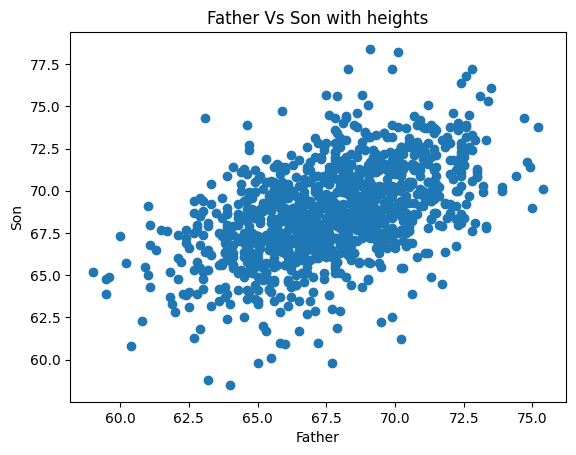

In [26]:
plt.scatter(x,y)
plt.xlabel("Father")
plt.ylabel("Son")
plt.title("Father Vs Son with heights")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)
x_train

,Father
259,65.4
204,62.7
427,72.0
720,64.3
836,68.0
...,...
330,67.3
466,67.6
121,69.2
1044,69.3


In [28]:
x_test

,Father
423,73.9
548,67.9
837,67.8
587,72.8
864,65.0
...,...
457,64.6
71,72.8
94,69.3
33,67.9


In [29]:
y_train

259     67.3
204     61.3
427     69.2
720     68.4
836     73.1
        ... 
330     68.9
466     66.3
121     68.9
1044    71.9
860     61.7
Name: Son, Length: 754, dtype: float64

In [30]:
y_test

423    70.0
548    69.0
837    73.6
587    70.6
864    63.5
       ... 
457    66.1
71     67.6
94     68.3
33     65.8
684    66.6
Name: Son, Length: 324, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([71.94127637, 68.8170954 , 68.76502572, 71.36850986, 67.3070746 ,
       69.96262842, 69.28572255, 70.17090716, 70.58746462, 68.19225921,
       70.06676779, 69.96262842, 71.73299764, 67.04672618, 69.70228001,
       67.93191079, 69.07744382, 68.66088635, 70.27504652, 67.67156238,
       67.72363206, 69.91055874, 67.82777143, 70.37918589, 69.1295135 ,
       69.4419316 , 70.84781303, 70.74367367, 67.77570174, 67.61949269,
       68.03605016, 68.55674699, 67.46328365, 68.8170954 , 70.53539494,
       70.43125557, 67.72363206, 68.24432889, 69.54607096, 70.58746462,
       70.22297684, 68.55674699, 68.86916508, 68.86916508, 69.85848906,
       68.03605016, 68.71295604, 68.14018952, 67.87984111, 68.55674699,
       69.85848906, 69.02537413, 69.07744382, 70.3271162 , 69.65021033,
       67.15086555, 69.49400128, 69.02537413, 66.36982031, 67.87984111,
       68.66088635, 69.70228001, 64.44324204, 66.52602935, 67.35914428,
       69.85848906, 67.82777143, 67.09879587, 69.85848906, 71.47

In [32]:
y_test

423    70.0
548    69.0
837    73.6
587    70.6
864    63.5
       ... 
457    66.1
71     67.6
94     68.3
33     65.8
684    66.6
Name: Son, Length: 324, dtype: float64

In [33]:
df1 = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference": y_test - y_pred})
df1

,Actual Value,Predicted Value,Difference
423,70.0,71.941276,-1.941276
548,69.0,68.817095,0.182905
837,73.6,68.765026,4.834974
587,70.6,71.368510,-0.768510
864,63.5,67.307075,-3.807075
...,...,...,...
457,66.1,67.098796,-0.998796
71,67.6,71.368510,-3.768510
94,68.3,69.546071,-1.246071
33,65.8,68.817095,-3.017095


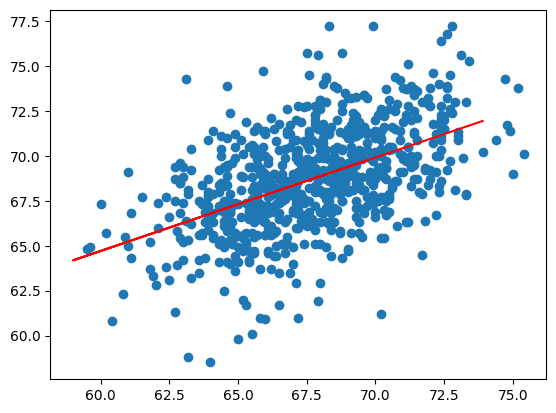

In [34]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,color='r')


In [35]:
print(model.coef_)

[0.52069683]


In [36]:
print(model.intercept_)

33.46178072537134


In [37]:
#Performace Evaluation 

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [38]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.8566674766330693

In [ ]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.027171124377887997

In [40]:
mse = mean_squared_error(y_test,y_pred)
mse

5.667989246087993

In [41]:
rmse = root_mean_squared_error(y_test,y_pred)
rmse

2.380753923883775

In [42]:
r2_sc = r2_score(y_test,y_pred)
r2_sc

0.221141945892383